In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

En el excel de Internet ,obtenido desde [los datos abierto del ENACOM](https://indicadores.enacom.gob.ar/datos-abiertos), existen 15 paginas de las cuales solo estaremos utilizando

* Penetración-poblacion: Incluye los datos de penetración de internet en la población.
* Penetracion-hogares: Proporciona información sobre la penetración de internet en hogares.
* Accesos por velocidad: Detalla los accesos a internet desglosados por velocidad en cada provincia.
* Dial-BAf: Presenta los datos de accesos dial-up y Banda Ancha Fija.
* Accesos Por Tecnología: Detalla los accesos a internet por tecnología en diferentes provincias.
* Velocidad % por prov: Presenta el porcentaje de accesos a internet por rangos de velocidad en cada provincia.

Estaremos cargando los datos por partes para darle mas claridad al analisis

# Penetración Poblacion y Hogares

Cargamos ambas hojas del excel y luego las unimos en un solo dataframe

In [3]:
df_penetracion_hab = pd.read_excel('Internet.xlsx', 'Penetración-poblacion')
df_penetracion_hog = pd.read_excel('Internet.xlsx', 'Penetracion-hogares')
df_penetracion = pd.merge(df_penetracion_hab, df_penetracion_hog, on=['Año', 'Trimestre', 'Provincia'])

Ahora podemos empezar a analisar los datos

Primero revisamos la cantidad de valores nulos y duplicados

In [4]:
df_penetracion.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hab        0
Accesos por cada 100 hogares    0
dtype: int64

In [5]:
df_penetracion.duplicated().sum()

0

Podemos ver que no existen entonces procedemos a la investigacion de outliers

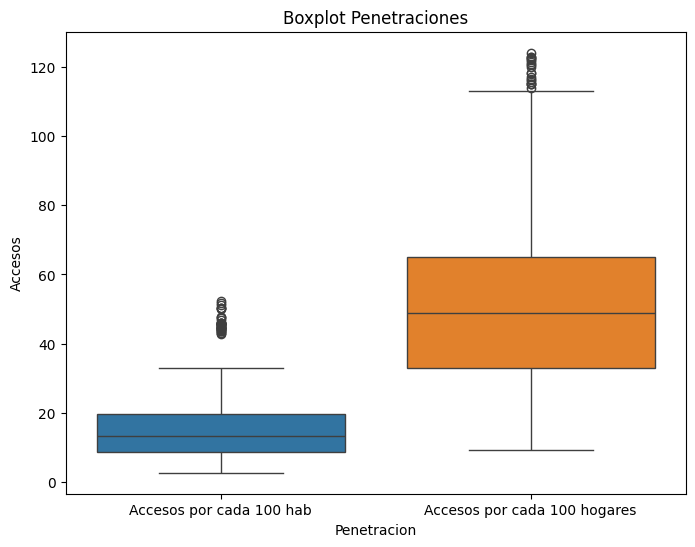

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(df_penetracion[['Accesos por cada 100 hab', 'Accesos por cada 100 hogares']])
plt.title('Boxplot Penetraciones')
plt.ylabel('Accesos')
plt.xlabel('Penetracion')
plt.show()

Podemos observar la existencia de varios outliers en ambas columnas

Revisamos los outliers por columna para encontrar una conclusion de ellos

In [7]:
data = df_penetracion[['Accesos por cada 100 hab']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_penetracion[outliers]['Provincia'].value_counts()

Provincia
Capital Federal    40
Name: count, dtype: int64

En la columna Habitantes podemos observar que todos los datos outliers se dan en la provincia 'Capital Federal'

In [8]:
data = df_penetracion[['Accesos por cada 100 hogares']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_penetracion[outliers]['Provincia'].value_counts()

Provincia
Capital Federal    20
Name: count, dtype: int64

Lo mismo podemos observar para la columna Hogares

Esto podria ser porque en la Capital Federal existe una mayor densidad de hogares y habitantes en su area y tambien al ser todo parte de una ciudad la infraestructura de la red de servicio es mayor

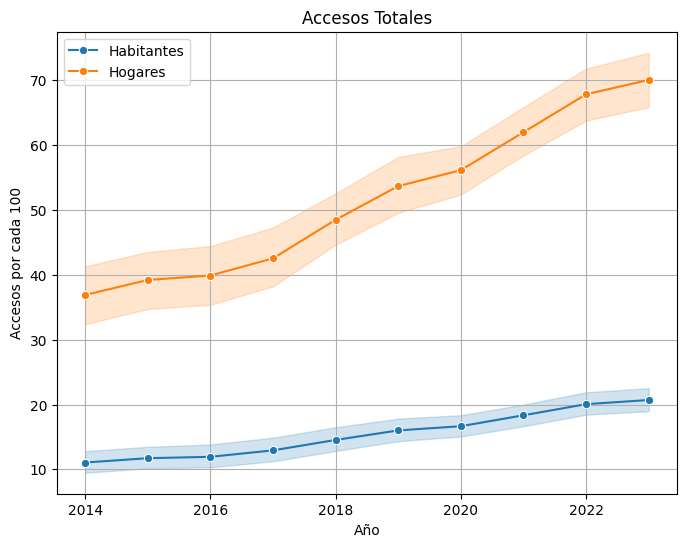

In [9]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hab', marker='o', label='Habitantes')
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hogares', marker='o', label='Hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100')
plt.title('Accesos Totales')
plt.legend(loc='upper left')
plt.grid()
plt.show()


Podemos ver que existe un incremento en el total de acceso para habitantes y hogares de mas del 50% durante el periodo 2014-1 y 2023-4

# Accesos por velocidad

Cargamos la hoja de excel

In [10]:
df_velocidad = pd.read_excel('Internet.xlsx', 'Accesos por velocidad')

Eliminamos una columna que no utilizaremos

In [11]:
df_velocidad.drop(columns=['Total'], inplace=True)

Primero revisamos la cantidad de valores nulos y duplicados

In [12]:
df_velocidad.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
dtype: int64

In [13]:
df_velocidad.dropna(inplace=True)

In [14]:
df_velocidad.duplicated().sum()

0

Ahora que ya limpiamos los datos procedemos a la investigacion de outliers

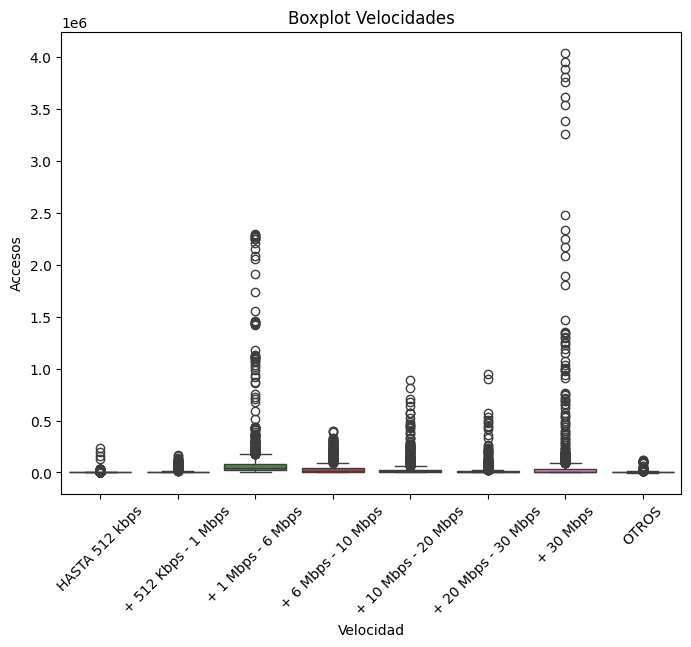

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(df_velocidad[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']])
plt.title('Boxplot Velocidades')
plt.xticks(rotation=45)
plt.ylabel('Accesos')
plt.xlabel('Velocidad')
plt.show()

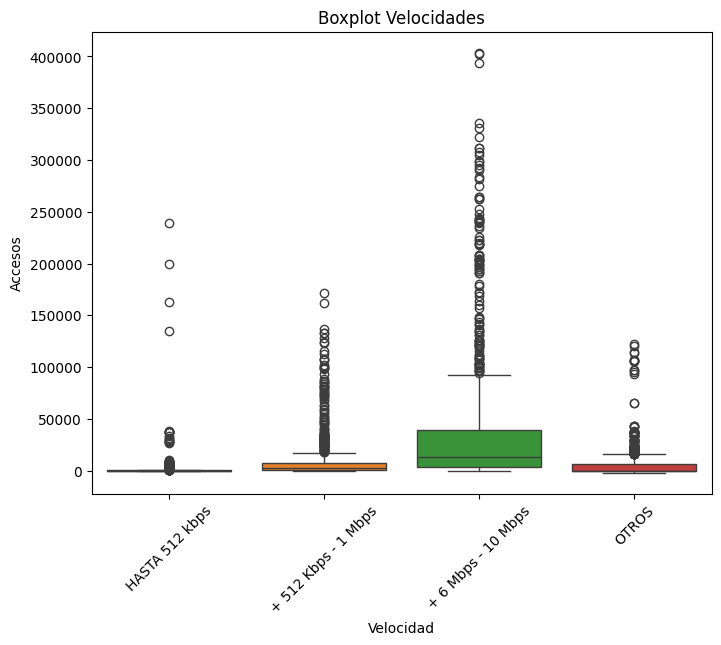

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(df_velocidad[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps', 'OTROS']])
plt.title('Boxplot Velocidades')
plt.xticks(rotation=45)
plt.ylabel('Accesos')
plt.xlabel('Velocidad')
plt.show()

Podemos observar la existencia de varios outliers en todas las columnas

Revisamos los outliers por columna para encontrar una conclusion de ellos

In [17]:
data = df_velocidad[['HASTA 512 kbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires           38
Formosa                24
Neuquén                21
Santa Fe               17
Entre Ríos             16
Río Negro              10
Jujuy                   9
Capital Federal         7
Salta                   6
La Pampa                6
Chubut                  4
Córdoba                 3
Santiago Del Estero     3
Misiones                1
Name: count, dtype: int64

In [18]:
data = df_velocidad[['+ 512 Kbps - 1 Mbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       39
Córdoba            21
Santa Fe           21
Capital Federal    12
Tucumán            10
Entre Ríos          9
Salta               2
Name: count, dtype: int64

In [19]:
data = df_velocidad[['+ 1 Mbps - 6 Mbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       40
Córdoba            32
Santa Fe           31
Capital Federal    23
Mendoza            12
Name: count, dtype: int64

In [20]:
data = df_velocidad[['+ 6 Mbps - 10 Mbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       40
Santa Fe           26
Córdoba            25
Capital Federal    23
Name: count, dtype: int64

In [21]:
data = df_velocidad[['+ 10 Mbps - 20 Mbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       38
Santa Fe           29
Córdoba            29
Capital Federal    25
Mendoza             3
Name: count, dtype: int64

In [22]:
data = df_velocidad[['+ 20 Mbps - 30 Mbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       31
Córdoba            25
Capital Federal    24
Santa Fe           21
San Luis           19
Entre Ríos          2
Name: count, dtype: int64

In [23]:
data = df_velocidad[['+ 30 Mbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       26
Capital Federal    25
Córdoba            18
Santa Fe           18
Tucumán            13
Mendoza             8
Entre Ríos          7
Chaco               5
Misiones            5
Salta               5
Corrientes          3
Name: count, dtype: int64

In [24]:
data = df_velocidad[['OTROS']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_velocidad[outliers]['Provincia'].value_counts()

Provincia
Santa Fe               22
Buenos Aires           20
Río Negro              16
San Luis               14
Chubut                  6
Jujuy                   6
Córdoba                 5
Entre Ríos              5
Capital Federal         4
Mendoza                 4
Santiago Del Estero     4
Neuquén                 2
San Juan                2
Santa Cruz              1
La Pampa                1
Name: count, dtype: int64

Los outliers no parecen superar 40 registros en el peor de los casos y nos da a entender una posible razon de su existencia es el cambia a tecnologias mas velocez en provincias con mayor desarrollo.

Esto puede darse a entender con el incremento de la necesidad de trabajos por linea (remotos) que conlleva a la necesidad de mayor velocidad en conectividad de internet. 

Los outliers tambien podrian ser una buena forma de analisar que provincias ya se les debe una actualizacion en sus tecnologias para mejorar asi su conectividad.

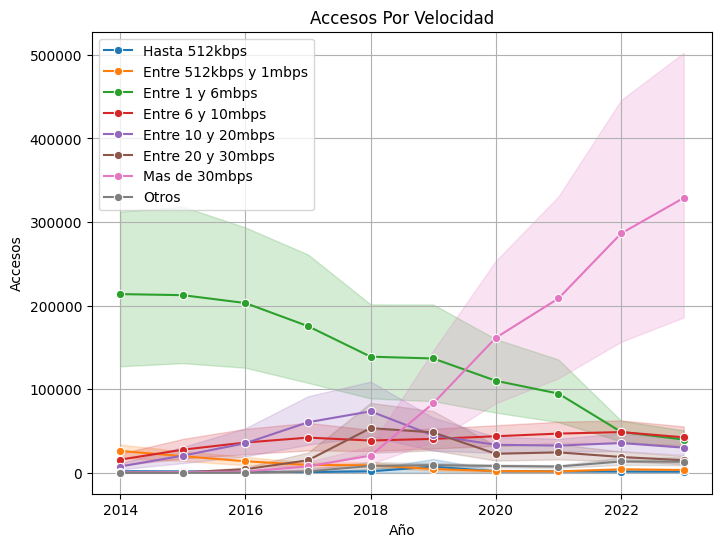

In [25]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_velocidad, x='Año', y='HASTA 512 kbps', marker='o', label='Hasta 512kbps')
sns.lineplot(data=df_velocidad, x='Año', y='+ 512 Kbps - 1 Mbps', marker='o', label='Entre 512kbps y 1mbps')
sns.lineplot(data=df_velocidad, x='Año', y='+ 1 Mbps - 6 Mbps', marker='o', label='Entre 1 y 6mbps')
sns.lineplot(data=df_velocidad, x='Año', y='+ 6 Mbps - 10 Mbps', marker='o', label='Entre 6 y 10mbps')
sns.lineplot(data=df_velocidad, x='Año', y='+ 10 Mbps - 20 Mbps', marker='o', label='Entre 10 y 20mbps')
sns.lineplot(data=df_velocidad, x='Año', y='+ 20 Mbps - 30 Mbps', marker='o', label='Entre 20 y 30mbps')
sns.lineplot(data=df_velocidad, x='Año', y='+ 30 Mbps', marker='o', label='Mas de 30mbps')
sns.lineplot(data=df_velocidad, x='Año', y='OTROS', marker='o', label='Otros')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Accesos Por Velocidad')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos observar que las velocidades menores a 30mbps estan en decaida y que el punto mayor de cambio fue entre 2018 con el comienzo del incremento de la linea de 'Mas de 30mbps' y 2020 cuando ella supera al resto.

# Dial-BAf

Cargamos la hoja de excel

In [26]:
df_dialbaf = pd.read_excel('Internet.xlsx', 'Dial-BAf')

Eliminamos una columna que no utilizaremos

In [27]:
df_dialbaf.drop(columns=['Total'], inplace=True)

Primero revisamos la cantidad de valores nulos y duplicados

In [28]:
df_dialbaf.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
dtype: int64

In [29]:
df_dialbaf.dropna(inplace=True)

In [30]:
df_dialbaf.duplicated().sum()

0

Ahora que ya limpiamos los datos procedemos a la investigacion de outliers

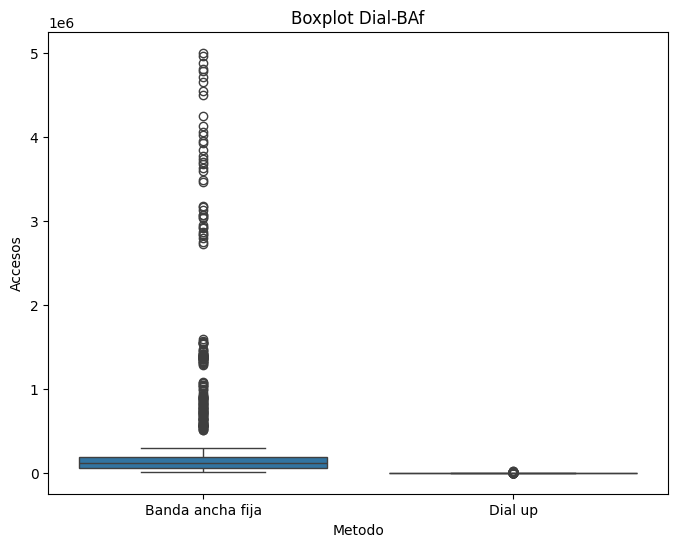

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_dialbaf[['Banda ancha fija', 'Dial up']])
plt.title('Boxplot Dial-BAf')
plt.ylabel('Accesos')
plt.xlabel('Metodo')
plt.show()

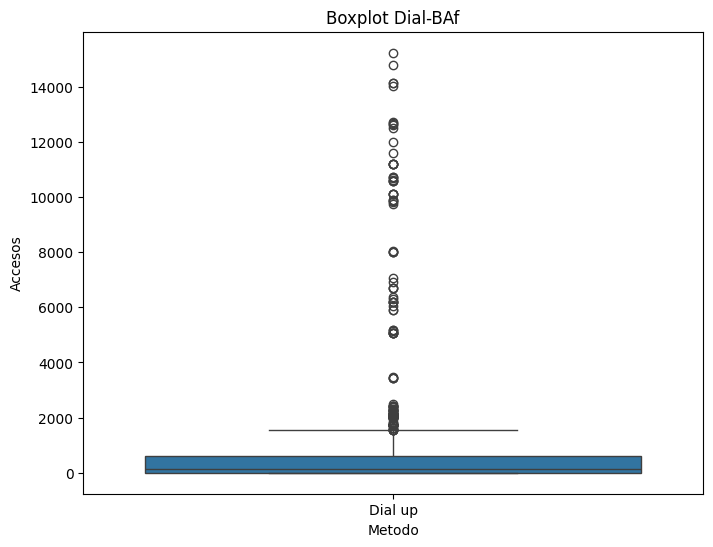

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_dialbaf[['Dial up']])
plt.title('Boxplot Dial-BAf')
plt.ylabel('Accesos')
plt.xlabel('Metodo')
plt.show()

Podemos observar la existencia de varios outliers en ambas columnas

Revisamos los outliers por columna para encontrar una conclusion de ellos

In [33]:
data = df_dialbaf[['Banda ancha fija']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_dialbaf[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       40
Capital Federal    40
Córdoba            40
Santa Fe           40
Name: count, dtype: int64

In [34]:
data = df_dialbaf[['Dial up']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_dialbaf[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       40
Capital Federal    34
Neuquén            23
Chubut             19
Mendoza            10
Name: count, dtype: int64

Estos outliers se pueden estar dando por la mayor concentracion de la poblacion en estas provincias y tambien por el poder adquisitivo de su poblacion o desarrollo de infraestuctura

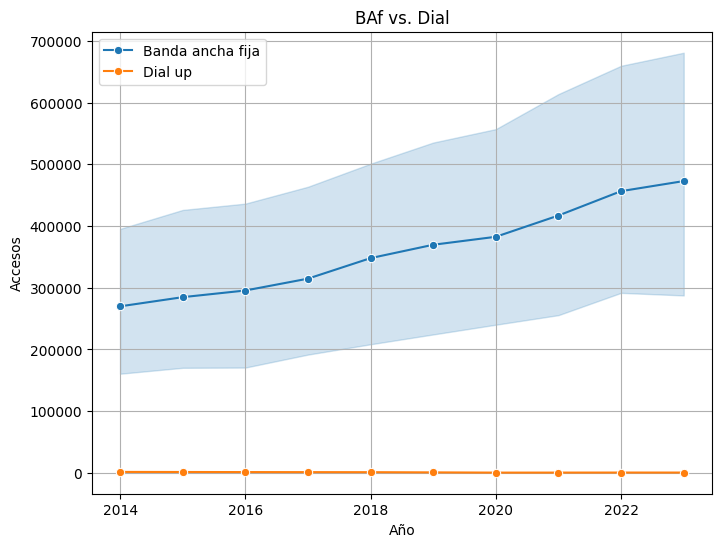

In [35]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_dialbaf, x='Año', y='Banda ancha fija', marker='o', label='Banda ancha fija')
sns.lineplot(data=df_dialbaf, x='Año', y='Dial up', marker='o', label='Dial up')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('BAf vs. Dial')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos observar que BAf esta en crecimiento mientras que Dial esta estatico en comparacion a BAf.

Esto nos indica que existe una demanda de BAf mientras que Dial se esta quedando obsoleto.

# Accesos Por Tecnología

Cargamos la hoja de excel

In [36]:
df_tecnologia = pd.read_excel('Internet.xlsx', 'Accesos Por Tecnología')

Eliminamos una columna que no utilizaremos

In [37]:
df_tecnologia.drop(columns=['Total'], inplace=True)

Primero revisamos la cantidad de valores nulos y duplicados

In [38]:
df_tecnologia.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
dtype: int64

In [39]:
df_tecnologia.dropna(inplace=True)

In [40]:
df_tecnologia.duplicated().sum()

0

Ahora que ya limpiamos los datos procedemos a la investigacion de outliers

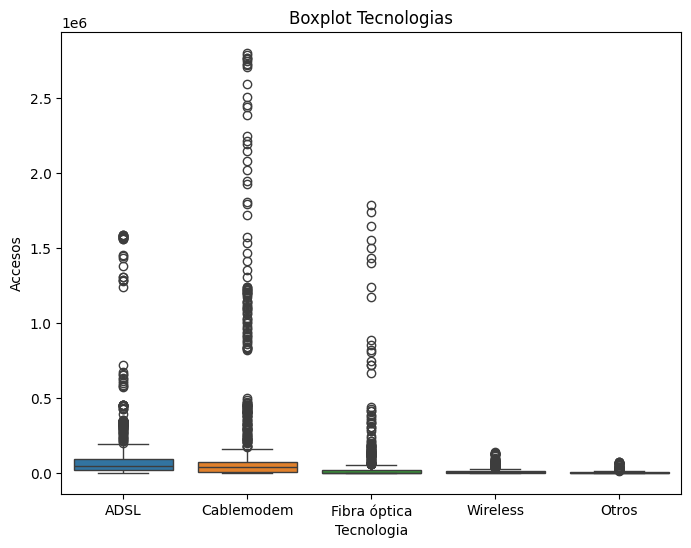

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']])
plt.title('Boxplot Tecnologias')
plt.ylabel('Accesos')
plt.xlabel('Tecnologia')
plt.show()

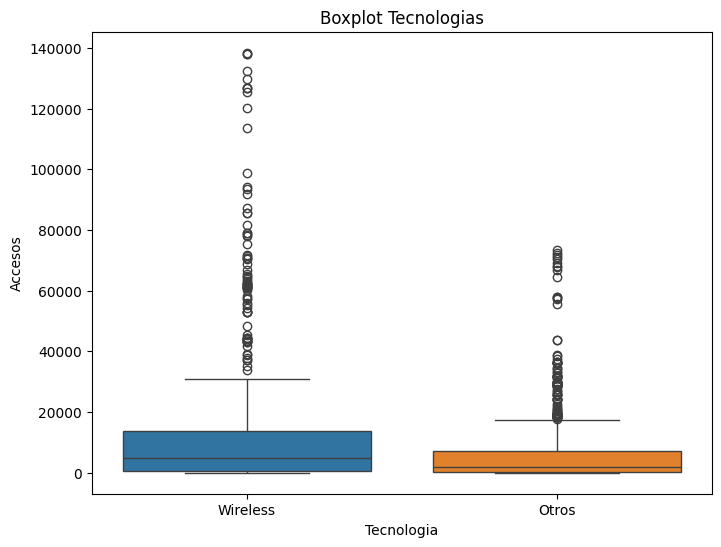

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_tecnologia[['Wireless', 'Otros']])
plt.title('Boxplot Tecnologias')
plt.ylabel('Accesos')
plt.xlabel('Tecnologia')
plt.show()

Podemos observar la existencia de varios outliers en todas las columnas

Revisamos los outliers por columna para encontrar una conclusion de ellos

In [43]:
data = df_tecnologia[['ADSL']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_tecnologia[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       40
Santa Fe           34
Córdoba            32
Capital Federal    23
Name: count, dtype: int64

In [44]:
data = df_tecnologia[['Cablemodem']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_tecnologia[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       40
Capital Federal    40
Córdoba            40
Santa Fe           40
Name: count, dtype: int64

In [45]:
data = df_tecnologia[['Fibra óptica']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_tecnologia[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires       40
Córdoba            16
Tucumán            14
Santa Fe           13
Mendoza            10
Capital Federal     9
Misiones            3
Salta               3
Chaco               1
Entre Ríos          1
Río Negro           1
Name: count, dtype: int64

In [46]:
data = df_tecnologia[['Wireless']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_tecnologia[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires    26
San Luis        22
Córdoba         19
Santa Fe        14
Name: count, dtype: int64

In [47]:
data = df_tecnologia[['Otros']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_tecnologia[outliers]['Provincia'].value_counts()

Provincia
Buenos Aires           40
Capital Federal        18
Río Negro              16
San Luis               14
Santa Fe               13
Chubut                  7
Jujuy                   3
Santiago Del Estero     2
Name: count, dtype: int64

Estos datos nos dan a entender que las provincias de Buenos Aires, Capital Federal, Cordoba y Santa Fe tienen una mejor infraestructura, esto puede darse a cabo por el poder adquisitivo de su poblacion y el mayor desarrollo en sus ciudades.

Tambien podemos ver que estas mismas fueron los pioneros en implementar tecnologias como Fibra óptica o Wireless

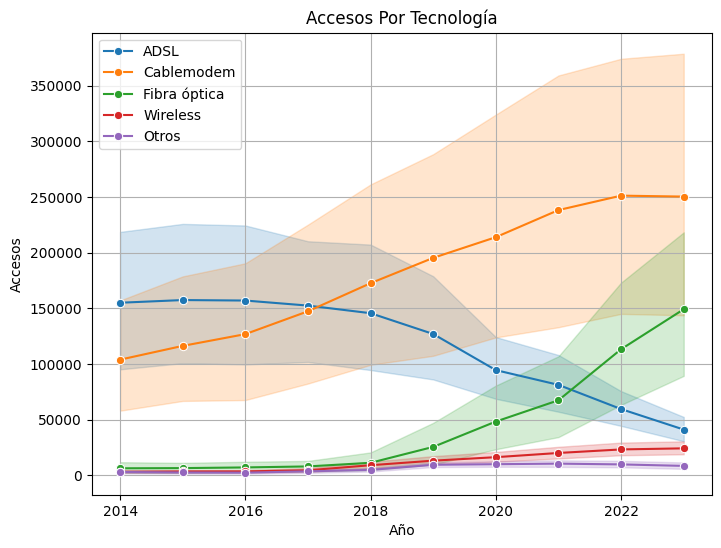

In [48]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_tecnologia, x='Año', y='ADSL', marker='o', label='ADSL')
sns.lineplot(data=df_tecnologia, x='Año', y='Cablemodem', marker='o', label='Cablemodem')
sns.lineplot(data=df_tecnologia, x='Año', y='Fibra óptica', marker='o', label='Fibra óptica')
sns.lineplot(data=df_tecnologia, x='Año', y='Wireless', marker='o', label='Wireless')
sns.lineplot(data=df_tecnologia, x='Año', y='Otros', marker='o', label='Otros')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Accesos Por Tecnología')
plt.legend(loc='upper left')
plt.grid()
plt.show()


Este grafico nos da a enteder que las tecnologias de Cablemodem, Fibra óptica y Wireless estan en incremento lo cual representa que nuevas tecnologias como la Fibra óptica y Wireless estan siendo implementadas en las ciudades y que la infraestuctura de cable al ser mayor se ha vuelto mas asequible para el consumidor.

Mientras tanto ADSL esta en decaida por ser una tecnología mas antigua y con velocidades promedio mas lentas, tambien tener en cuenta que Cablemodem parece estar tomando su lugar junto con Fibra óptica pero este ultimo no a tal nivel.

# Velocidad % por prov

Cargamos la hoja de excel

In [49]:
df_vmd = pd.read_excel('Internet.xlsx', 'Velocidad % por prov')

Primero revisamos la cantidad de valores nulos y duplicados

In [50]:
df_vmd.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [51]:
df_vmd.duplicated().sum()

0

Podemos ver que no existen entonces procedemos a la investigacion de outliers

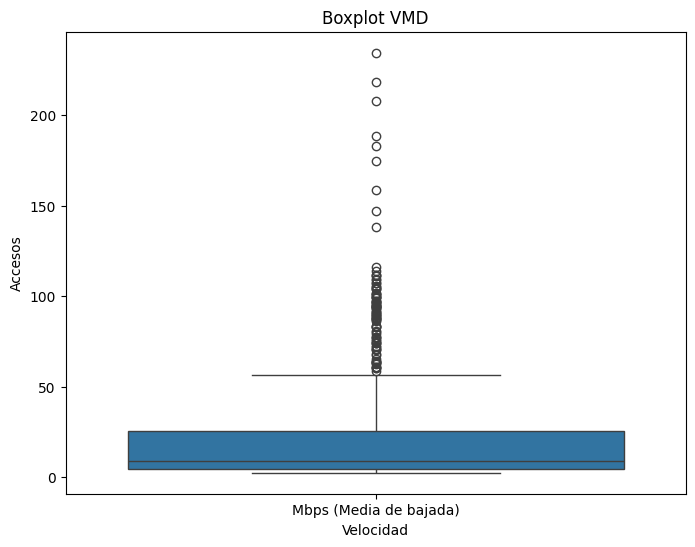

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_vmd[['Mbps (Media de bajada)']])
plt.title('Boxplot VMD')
plt.ylabel('Accesos')
plt.xlabel('Velocidad')
plt.show()

Podemos observar la existencia de varios outliers

Revisamos los outliers para encontrar una conclusion de ellos

In [53]:
data = df_vmd[['Mbps (Media de bajada)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

df_vmd[outliers]['Provincia'].value_counts()

Provincia
Capital Federal    16
Buenos Aires        9
Catamarca           6
Chaco               5
Córdoba             5
Corrientes          5
Entre Ríos          5
Formosa             5
La Rioja            5
Misiones            5
Neuquén             5
Río Negro           5
Salta               5
Santa Fe            5
Tucumán             5
San Luis            3
Name: count, dtype: int64

Podemos ver que hay mas registros de outliers en las provincias de Capital Federal y Buenos Aires lo cual podria ser por el mayor poder adquisitivo de la poblacion de estas provincias y el mayor desarrollo de la infraestuctura en estas mismas lo cual conlleva a una mayor velocidad de bajada.

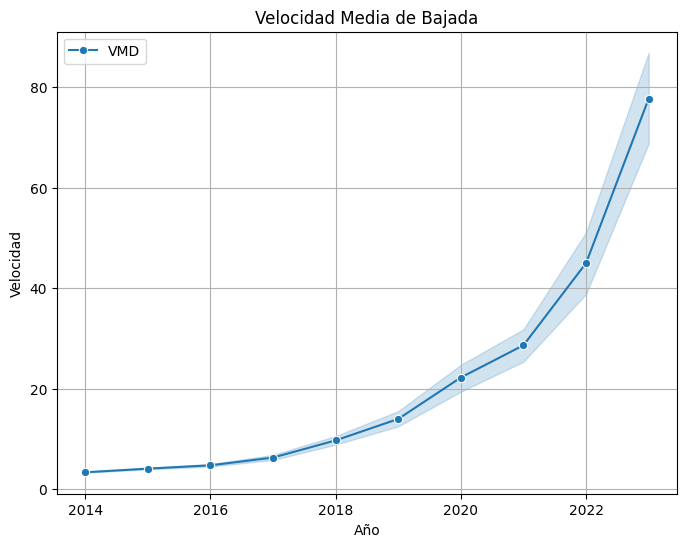

In [54]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_vmd, x='Año', y='Mbps (Media de bajada)', marker='o', label='VMD')
plt.xlabel('Año')
plt.ylabel('Velocidad')
plt.title('Velocidad Media de Bajada')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos ver que la Velocidad Media de Bajada esta teniendo un incremento mayor en los ultimos 5 años lo cual se puede relacionar con la implementacion de tecnologias mas rapidas como la Fibra óptica.

Esto es algo muy bueno para el consumidor porque le ofrece un servicio mas rapido lo cual ayuda a la conectividad de los usuarios al resto del mundo.

# Conclusiones

Gracias a estas 5 medidas podemos obsevar que la cantidad de accesos en esta en incremento y la velocidad de ellos tambien, pero tambien podemos observar que existen provincias con mayor desarrollo lo cual crea ciertas discrepancias en los datos por al ser outliers. Esto puede ser una señal de un problema de centralizacion en las grandes ciudades de Argentina como Buenos Aires, Córdoba o Rosario los cuales se encuentran en las provincias que hemos visto que tienen la mayor cantidad de outliers.

Por otro lado tambien podemos ver que existe una relacion entre nuevas tecnologias y mayores velocidades en los accesos a internet. Esto es algo muy bueno porque no solo mejora el servicio que se le otorga al cliente pero tambien aumenta la conectividad entre la poblacion nacional e internacional.

El incremento de accesos totatles tambien nos indica que existe una mayor necesidad / demanda de servicios de internet en la actualidad y que existe un aumento en la infraestuctura de la red a zonas mas remotas.

In [69]:
df = pd.merge(df_penetracion, df_velocidad, on=['Año', 'Trimestre', 'Provincia'])
df = pd.merge(df, df_dialbaf, on=['Año', 'Trimestre', 'Provincia'])
df = pd.merge(df, df_tecnologia, on=['Año', 'Trimestre', 'Provincia'])
df = pd.merge(df, df_vmd, on=['Año', 'Trimestre', 'Provincia'])

In [70]:
df_total = pd.read_excel('Internet.xlsx', 'Accesos Por Tecnología')[['Año', 'Trimestre', 'Provincia', 'Total']]

In [71]:
df = pd.merge(df, df_total, on=['Año', 'Trimestre', 'Provincia'])

In [72]:
df.to_csv('Internet_recortado.csv', index=False)